# Import Libraries

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
# disable tensorflow log level infos
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' # show only errors

import sys
import pandas as pd

if '..' not in sys.path:
    sys.path.insert(0,'..')

In [3]:
from src.base.data_loaders.data_loader import DLName
from src.base.gt_loaders.gt_names import GTName

from src.base.experiment.training.base_models import BaseModel
from src.base.experiment.training.model_creator import Optimizer

from src.base.experiment.dataset.benchmark_dataset import BenchmarkDataset
from src.base.experiment.evaluation.model_evaluator import DataSource, DataPredSelection

from src.exp_runner import ExperimentRunner

from src.m_utils.mtl_approach import MTLApproach

from src.base.experiment.tasks.task import ICAO_REQ
from src.base.experiment.tasks.task import MNIST_TASK
from src.base.experiment.tasks.task import FASHION_MNIST_TASK
from src.base.experiment.tasks.task import CIFAR_10_TASK
from src.base.experiment.tasks.task import CELEB_A_TASK

 ==> Restrict GPU memory growth: True


# Start Network runner

In [4]:
kwargs = { 
    'use_neptune': True,
    'exp_params' : {
        'name': 'train_vg16_mtl_3_approach',
        'description': 'Training MTL network for FVC-ICAO tasks with Handcrafted 3 network architecture',
        'tags': ['mtl', 'handcrafted_3', 'handcrafted_3_exp', 'fvc', 'ground_truths', '10 epochs'],
        'src_files': ["../src/**/*.py"]
    },
    'properties': {
        'approach': MTLApproach.HAND_3,
        'benchmarking': {
            'use_benchmark_data': False,
            'benchmark_dataset': BenchmarkDataset.MNIST,
            'tasks': list(MNIST_TASK)
        },
        'icao_data': {
            'icao_gt': {
                'use_gt_data': True,
                'gt_names': {
                    'train_validation': [],
                    'test': [],
                    'train_validation_test': [GTName.FVC]
                },
            },
            'icao_dl': {
                'use_dl_data': False,
                'tagger_model': None
            },
            'reqs': list(ICAO_REQ),
            'aligned': False,
        },
        'balance_input_data': False,
        'train_model': True,
        'save_trained_model': True,
        'exec_nas': False,
        'orig_model_experiment_id': '',
        'sample_training_data': False,
        'sample_prop': 1.0
    },
    'net_train_params': {
        'base_model': BaseModel.VGG16,
        'batch_size': 32,
        'n_epochs': 10,
        'early_stopping': 200,
        'learning_rate': 1e-3,
        'optimizer': Optimizer.ADAMAX,
        'dropout': 0.3
    },
    'nas_params': {}
}

runner = ExperimentRunner(**kwargs)

-------------------- Init ExperimentRunner -------------------
---------------------------
Parent Process ID: 95184
Process ID: 99017
---------------------------
-----
Use Neptune:  True
-----
-------------------
Args: 
{'exp_params': {'description': 'Training MTL network for FVC-ICAO tasks with '
                               'Handcrafted 3 network architecture',
                'name': 'train_vg16_mtl_3_approach',
                'src_files': ['../src/**/*.py'],
                'tags': ['mtl',
                         'handcrafted_3',
                         'handcrafted_3_exp',
                         'fvc',
                         'ground_truths',
                         '10 epochs']},
 'nas_params': {},
 'net_train_params': {'base_model': <BaseModel.VGG16: {'name': 'vgg16', 'target_size': (224, 224), 'prep_function': <function preprocess_input at 0x7f9ff4ad6820>}>,
                      'batch_size': 32,
                      'dropout': 0.3,
                      'early_stopp

# Load Data

In [5]:
runner.load_training_data()

-------------------- load training data -------------------
Loading data
Loading GT FVC - TRAIN split...
..Ignoring 0 empty label values
Input data.shape: (4928, 26)
Loading GT FVC - VALIDATION split...
..Ignoring 0 empty label values
Input data.shape: (547, 26)
Loading GT FVC - TEST split...
..Ignoring 0 empty label values
Input data.shape: (288, 26)
Data loaded


In [6]:
runner.data_processor.train_data.head()

,origin,img_name,mouth,rotation,l_away,eyes_closed,close,hat,dark_glasses,frames_heavy,...,sh_head,blurred,ink_mark,skin_tone,washed_out,pixelation,hair_eyes,background,red_eyes,aligned
0,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
1,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
2,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,False
3,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False
4,fvc,/home/guilherme/data1/Dropbox/Link to Desktop/...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,False


# Sampling Training Data

In [7]:
runner.sample_training_data()

-------------------- sample training data -------------------
Not applying subsampling in training data!


# Data Balancing

In [8]:
runner.balance_input_data()

-------------------- balance input data -------------------
Not balancing input_data


# Data Generators

In [9]:
runner.setup_data_generators()

-------------------- setup data generators -------------------
Starting data generators
Found 4928 validated image filenames.
Found 547 validated image filenames.
Found 288 validated image filenames.
TOTAL: 5763

Logging class indices
 .. MTL model not logging class indices!

Logging class labels
 COMPLIANT label: 1
 NON_COMPLIANT label: 0
 DUMMY label: -1
 DUMMY_CLS label: 2
 NO_ANSWER label: -99


# Setup Experiment

In [10]:
runner.setup_experiment()

-------------------- create experiment -------------------
Setup neptune properties and parameters
Properties and parameters setup done!


# Labels Distribution

In [11]:
runner.summary_labels_dist()

-------------------- summary labels dist -------------------
Requisite: MOUTH
N_TRAIN_COMP: 3607 (73.19%)
N_TRAIN_NOT_COMP: 1321 (26.81%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 420 (76.78%)
N_VALIDATION_NOT_COMP: 127 (23.22%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 215 (74.65%)
N_TEST_NOT_COMP: 73 (25.35%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: ROTATION
N_TRAIN_COMP: 3716 (75.41%)
N_TRAIN_NOT_COMP: 1212 (24.59%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 410 (74.95%)
N_VALIDATION_NOT_COMP: 137 (25.05%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 208 (72.22%)
N_TEST_NOT_COMP: 80 (27.78%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: L_AWAY
N_TRAIN_COMP: 3375 (68.49%)
N_TRAIN_NOT_COMP: 1553 (31.51%)
N_TRAIN_DUMMY: 0 (0.0%)
N_VALIDATION_COMP: 382 (69.84%)
N_VALIDATION_NOT_COMP: 165 (30.16%)
N_VALIDATION_DUMMY: 0 (0.0%)
N_TEST_COMP: 201 (69.79%)
N_TEST_NOT_COMP: 87 (30.21%)
N_TEST_DUMMY: 0 (0.0%)
----
Requisite: EYES_CLOSED
N_TRAIN_COMP: 3887 (78.88%)
N_TRAIN_NOT_COMP: 1041 (21.12%)
N_TRAIN_D

# Create Model

In [12]:
runner.create_model()

-------------------- create model -------------------
Creating model...
Model created


# Vizualize Model

In [13]:
%%capture
runner.visualize_model(outfile_path=f"figs/handcrafted_mtl_model_3.png")

In [14]:
%%capture
runner.model_summary()

# Training Model

In [15]:
runner.train_model()

-------------------- train model -------------------
Training VGG16 network
 .. Not fine tuning base model...
  .. Total params: 17,555,310
  .. Trainable params: 2,840,622
  .. Non-trainable params: 14,714,688
Epoch 1/10
154/154 [==============================] - 413s 3s/step - loss: 1.0130 - background_loss: 0.6208 - close_loss: 0.5346 - ink_mark_loss: 0.6623 - pixelation_loss: 0.5264 - washed_out_loss: 0.0904 - blurred_loss: 0.4325 - sh_head_loss: 0.3799 - mouth_loss: 0.0367 - veil_loss: 0.6070 - red_eyes_loss: 0.5279 - flash_lenses_loss: 0.2689 - dark_glasses_loss: 0.6976 - l_away_loss: 0.3222 - frame_eyes_loss: 0.6514 - hair_eyes_loss: 0.6404 - eyes_closed_loss: 0.3657 - frames_heavy_loss: 0.0208 - sh_face_loss: 0.6979 - skin_tone_loss: 0.0697 - light_loss: 0.2957 - hat_loss: 0.4681 - rotation_loss: 0.6803 - reflection_loss: 0.5328 - background_accuracy: 0.7271 - close_accuracy: 0.7496 - ink_mark_accuracy: 0.6849 - pixelation_accuracy: 0.7837 - washed_out_accuracy: 0.9890 - blurre

# Plots

-------------------- draw training history -------------------


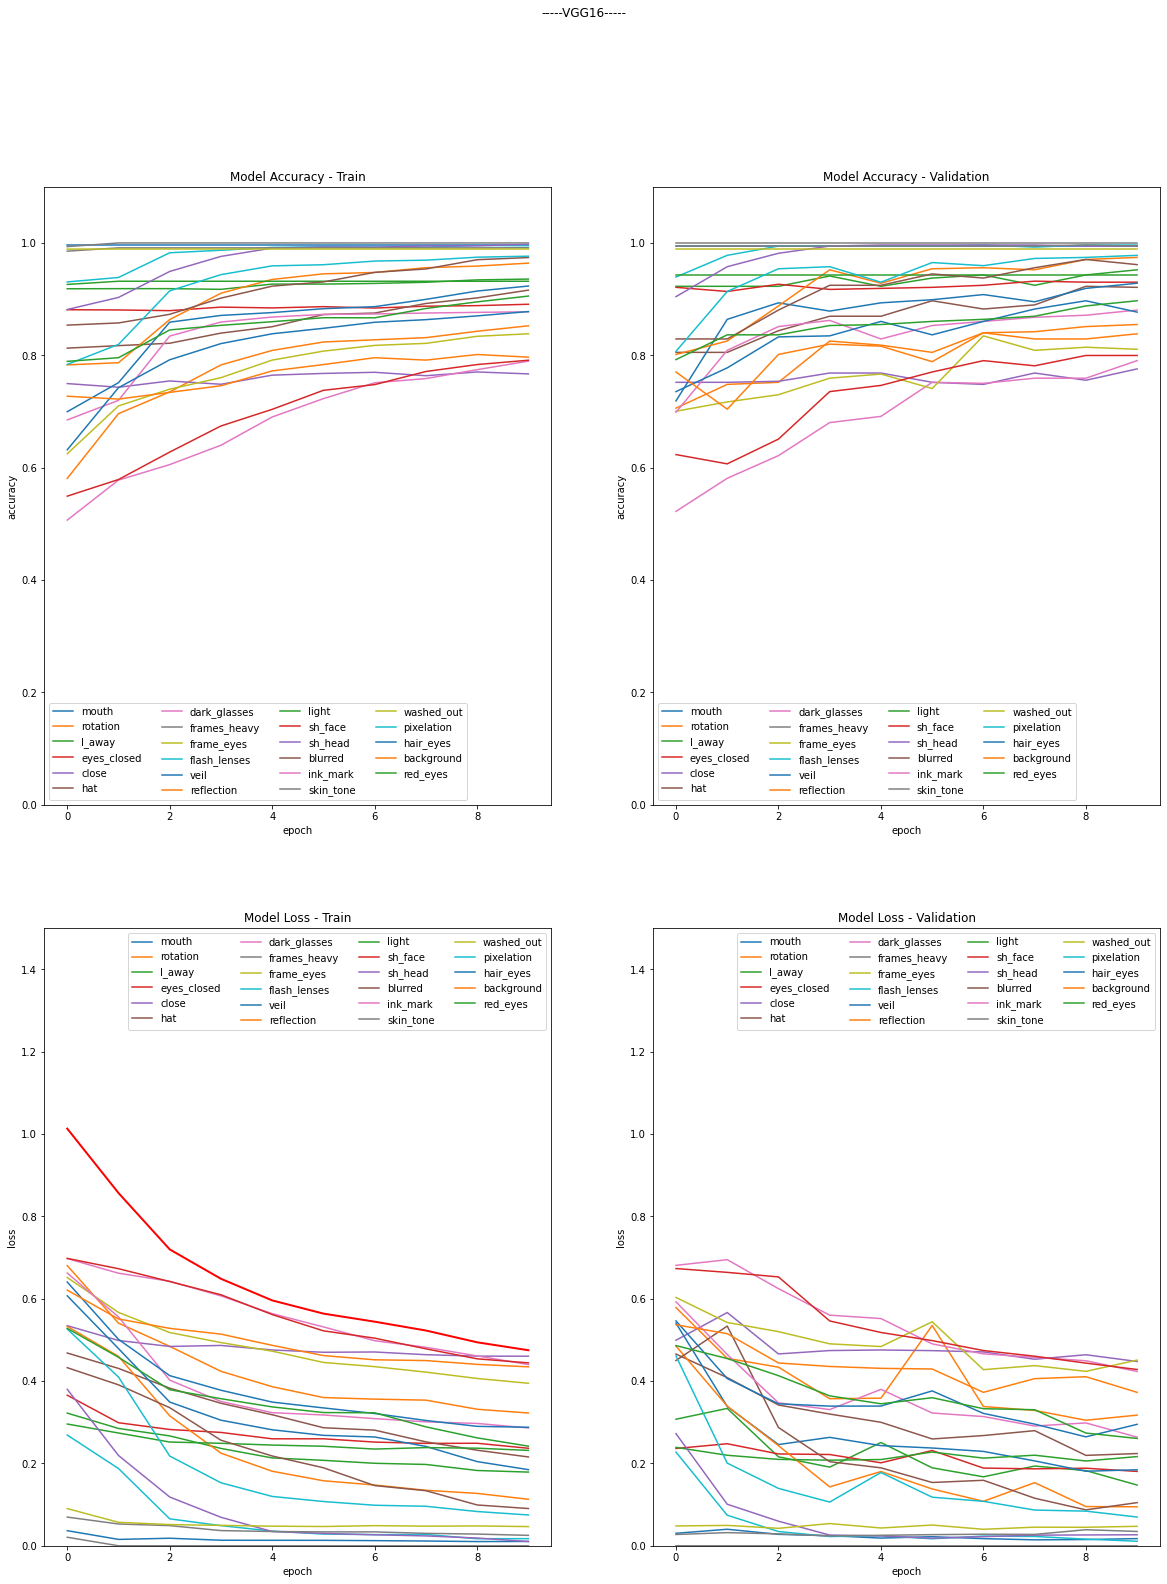

In [16]:
runner.draw_training_history()

# Load Best Model

In [17]:
runner.load_best_model()

-------------------- load best model -------------------
..Loading best model
..Checkpoint weights loaded


# Saving Trained Model

In [18]:
runner.save_model()

-------------------- save model -------------------
Not saving model!


# Test Trained Model

## Validation Split

In [19]:
runner.set_model_evaluator_data_src(DataSource.VALIDATION)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
18/18 [==============================] - 33s 2s/step
Prediction finished!


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/sklearn/metrics/_ranking.py:803: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn("No negative samples in y_true, "


  Task  0: mouth           | EER_mean: 0.25200 | EER_interp: 0.25220 | ACC: 0.74770
  Task  1: rotation        | EER_mean: 0.26280 | EER_interp: 0.26310 | ACC: 0.73670
  Task  2: l_away          | EER_mean: 0.15150 | EER_interp: 0.15030 | ACC: 0.85010
  Task  3: eyes_closed     | EER_mean: 0.02490 | EER_interp: 0.02190 | ACC: 0.97620
  Task  4: close           | EER_mean: 0.16670 | EER_interp: 0.18680 | ACC: 0.79340
  Task  5: hat             | EER_mean: 0.05380 | EER_interp: 0.06000 | ACC: 0.93600
  Task  6: dark_glasses    | EER_mean: 0.01920 | EER_interp: 0.00000 | ACC: 0.99820
  Task  7: frames_heavy    | EER_mean: 0.05510 | EER_interp: 0.00000 | ACC: 0.94520
  Task  8: frame_eyes      | EER_mean: 0.07240 | EER_interp: 0.07290 | ACC: 0.92690
  Task  9: flash_lenses    | EER_mean: 0.15040 | EER_interp: 0.15360 | ACC: 0.84460
  Task 10: veil            | EER_mean: 0.02920 | EER_interp: 0.00000 | ACC: 0.97260
  Task 11: reflection      | EER_mean: 0.22340 | EER_interp: 0.22300 | ACC: 

## Test Split

In [20]:
runner.set_model_evaluator_data_src(DataSource.TEST)
runner.test_model(verbose=False)

Testing Trained Model
Predicting labels....
9/9 [==============================] - 21s 3s/step
Prediction finished!


/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:630: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]
/home/guilherme/anaconda3/envs/mteval-icao-reqs/submodules/icao_nets_training/lib/python3.8/site-packages/scipy/interpolate/interpolate.py:633: RuntimeWarning: invalid value encountered in multiply
  y_new = slope*(x_new - x_lo)[:, None] + y_lo


  Task  0: mouth           | EER_mean: 0.28770 | EER_interp: 0.29270 | ACC: 0.70490
  Task  1: rotation        | EER_mean: 0.27400 | EER_interp: 0.26820 | ACC: 0.72920
  Task  2: l_away          | EER_mean: 0.18410 | EER_interp: 0.18400 | ACC: 0.81600
  Task  3: eyes_closed     | EER_mean: 0.03640 | EER_interp: 0.03320 | ACC: 0.96880
  Task  4: close           | EER_mean: 0.09790 | EER_interp: 0.00000 | ACC: 0.90280
  Task  5: hat             | EER_mean: 0.05880 | EER_interp: 0.04840 | ACC: 0.95830
  Task  6: dark_glasses    | EER_mean: 0.03230 | EER_interp: 0.03560 | ACC: 0.96180
  Task  7: frames_heavy    | EER_mean: 0.00350 | EER_interp: 0.00000 | ACC: 0.99650
  Task  8: frame_eyes      | EER_mean: 0.10710 | EER_interp: 0.10740 | ACC: 0.89240
  Task  9: flash_lenses    | EER_mean: 0.11670 | EER_interp: 0.11540 | ACC: 0.88540
  Task 10: veil            | EER_mean: 0.06370 | EER_interp: 0.05560 | ACC: 0.93750
  Task 11: reflection      | EER_mean: 0.21210 | EER_interp: 0.21500 | ACC: 

# Visualize Model Classification

# Finishing Experiment Manager

In [21]:
runner.finish_experiment()

-------------------- finish experiment -------------------
Finishing Neptune
Shutting down background jobs, please wait a moment...
Done!
Waiting for the remaining 5179 operations to synchronize with Neptune. Do not kill this process.
Still waiting for the remaining 5179 operations (0.00% done). Please wait.
Still waiting for the remaining 5179 operations (0.00% done). Please wait.
Experiencing connection interruptions. Will try to reestablish communication with Neptune. Internal exception was: RequestsFutureAdapterTimeout
Still waiting for the remaining 5179 operations (0.00% done). Please wait.
Communication with Neptune restored!


Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.
Error occurred during asynchronous operation processing: Value of float attribute cannot be malformed.


All 5179 operations synced, thanks for waiting!
Explore the metadata in the Neptune app:
https://app.neptune.ai/guilhermemg/icao-nets-training-2/e/ICAO-351
